# Question 2. Navigate

### Overview:

One of the software division’s primary tasks is creating an autonomous flight plan. At SUAS, we are given a list of 10 GPS coordinates as waypoints our UAV must fly to, and a geofence, essentially a polygon (convex or concave) defining the UAVs bounds. We use an edge smoothing algorithm known as centripetal catrom-mull spline (if you want to learn more, I would recommend using this Desmos sandbox), but for this question, we can assume that we just connect the waypoints, forming an n-gon. However, the polygon sometimes intersects with the geofence, resulting in an invalid flight plan, which must be corrected. Lastly, we use autopilot software known as QGroundControl (QGC) where plans can be imported using a .plan file.

### Your Task:

- Fix the flight plan by traversing within the geofence with a 25ft distance from the edge instead of exceeding its bounds (see demonstration image). 
- Generate a .plan file (hint: use JSON) which can be imported in QGC. Learn how these files are formatted by installing QGC on your personal computer (QGC Install) (if you are using a Chromebook, email prathampmehta@gmail.com, and we’ll try to find a compromise)

### Restrictions:

Don’t use non-standard libraries except shapely and numpy.

### File Input Format: 
The first line of input contains N, M followed by N lines with latitude, longitude for the geofence coordinates separated by spaces of each point, followed by M lines with latitude, longitude for the waypoints separated by spaces of each point

### File Output Format: 
Output the navigate.plan JSON file (to view, I recommend using a JSON editor) which can be directly imported into QGroundControl (assume the altitude for all coordinates is 100ft and waypoint speed is 30mph). The waypoint coordinates do not have to match the ones provided exactly, but they should be accurate to 4 decimal places.


### Load Input

In [1]:
def read_input(in_file):
    with open(in_file, "r") as fh:
        header = fh.readline()
        rec = header.split(" ")
        (N, M) = int(rec[0]), int(rec[1])

        points = []
        for line in fh:
            rec = line.strip().split(" ")
            points.append([float(rec[0]), float(rec[1])])
        
        geofence_coords = points[:N]
        waypoints = points[N:]

    return geofence_coords, waypoints

In [2]:
# test 
geofence_coords, waypoints = read_input("navigate.txt")

print("Geofence coordinates :", len(geofence_coords))
for point in geofence_coords:
    print(point)
print("Waypoints :", len(waypoints))
for point in waypoints:
    print(point)

Geofence coordinates : 18
[37.681518, -121.8936646]
[37.6815855, -121.8926105]
[37.6822613, -121.8916441]
[37.6817617, -121.8917269]
[37.6816344, -121.8912419]
[37.6813856, -121.8913558]
[37.680703, -121.8904147]
[37.6808425, -121.8908941]
[37.6805952, -121.8914147]
[37.6809136, -121.8911588]
[37.6811416, -121.8917205]
[37.6800919, -121.8913751]
[37.6796919, -121.8924466]
[37.6801628, -121.8926604]
[37.6806625, -121.8924309]
[37.6807229, -121.8929952]
[37.681113, -121.8930433]
[37.681518, -121.8936646]
Waypoints : 16
[37.6814695, -121.8934354]
[37.6817346, -121.8923366]
[37.6820057, -121.8918026]
[37.6815723, -121.8914061]
[37.6812009, -121.891247]
[37.6808829, -121.8907372]
[37.6807847, -121.8911661]
[37.6810793, -121.891398]
[37.6809256, -121.8917514]
[37.6801571, -121.8915545]
[37.6802019, -121.8919375]
[37.679901, -121.8923366]
[37.6803941, -121.8924472]
[37.680774, -121.8926684]
[37.6808722, -121.8929516]
[37.6814229, -121.8934263]


### View Input

In [3]:
import pandas as pd

point_types = ["geofence_coords", "waypoints"]
# Convert to dataframe
df = pd.DataFrame( 
    {
        "latitude": [p[0] for p in geofence_coords] + [p[0] for p in waypoints],
        "longitude": [p[1] for p in geofence_coords] + [p[1] for p in waypoints],
        "point_type": (
            [point_types.index("geofence_coords")] * len(geofence_coords) 
            + [point_types.index("waypoints")] * len(waypoints)
        ),
    }
)
df

,latitude,longitude,point_type
0,37.681518,-121.893665,0
1,37.681585,-121.892611,0
2,37.682261,-121.891644,0
3,37.681762,-121.891727,0
4,37.681634,-121.891242,0
5,37.681386,-121.891356,0
6,37.680703,-121.890415,0
7,37.680842,-121.890894,0
8,37.680595,-121.891415,0
9,37.680914,-121.891159,0


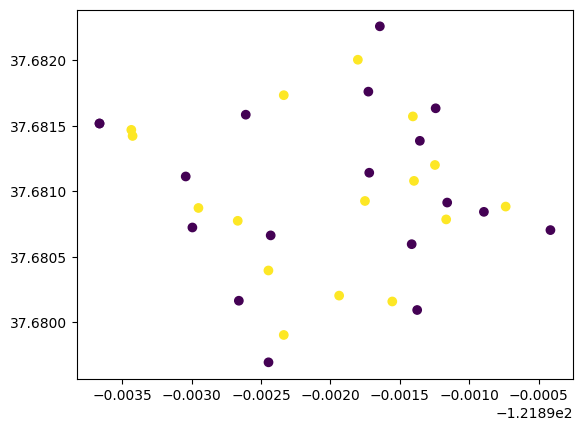

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data=df, x="longitude", y="latitude", c="point_type")

### View Output

In [5]:
import json

with open("navigate.plan", "r") as fh:
    plan_data = json.load(fh)

print(json.dumps(plan_data, indent=4))

{
    "fileType": "Plan",
    "version": 1,
    "geoFence": {
        "circles": [],
        "polygons": [
            {
                "inclusion": true,
                "polygon": [
                    [
                        37.681518,
                        -121.8936646
                    ],
                    [
                        37.6815855,
                        -121.8926105
                    ],
                    [
                        37.6822613,
                        -121.8916441
                    ],
                    [
                        37.6817617,
                        -121.8917269
                    ],
                    [
                        37.6816344,
                        -121.8912419
                    ],
                    [
                        37.6813856,
                        -121.8913558
                    ],
                    [
                        37.680703,
                        -121.8904147
              

#### Functions to convert to plan JSON for QGC

In [6]:
def create_plan_dict(geofence_coords, start_point):
    """
    return the initial empty plan
    args:
      - geofence_coords: a list of (latitude, longitude)
      - start_point: [latitude, longtidue, altitude]
    """
    return {
        "fileType": "Plan",
        "version": 1,
        "geoFence": {
            "circles": [],
            "polygons": [
                {
                    "inclusion": True,
                    "polygon": geofence_coords,
                    "version": 1
                }
            ],
            "version": 2
        },
        "rallyPoints": {
            "points": [],
            "version": 2
        },
        "groundStation": "QGroundControl",
        "mission": {
            "plannedHomePosition": start_point,
            "vehicleType": 2,
            "version": 2,
            "cruiseSpeed": 15,
            "firmwareType": 12,
            "globalPlanAltitudeMode": 1,
            "hoverSpeed": 15,
            "items": [],        
        }
    }

In [7]:
# Test
plan_dict = create_plan_dict(geofence_coords, waypoints[0]+[50])
print(json.dumps(plan_dict, indent=4))

{
    "fileType": "Plan",
    "version": 1,
    "geoFence": {
        "circles": [],
        "polygons": [
            {
                "inclusion": true,
                "polygon": [
                    [
                        37.681518,
                        -121.8936646
                    ],
                    [
                        37.6815855,
                        -121.8926105
                    ],
                    [
                        37.6822613,
                        -121.8916441
                    ],
                    [
                        37.6817617,
                        -121.8917269
                    ],
                    [
                        37.6816344,
                        -121.8912419
                    ],
                    [
                        37.6813856,
                        -121.8913558
                    ],
                    [
                        37.680703,
                        -121.8904147
              

In [8]:
def point_to_mission_dict(latitude, longitude, altitude=30.48780487804878):
    """Convert a point to a mission item for plan"""
    return {
        "AMSLAltAboveTerrain": altitude,
        "Altitude": altitude,
        "AltitudeMode": 1,
        "autoContinue": True,
        "command": 16,
        "doJumpId": 29,
        "frame": 3,
        "params": [0, 0, 0, None, latitude, longitude, altitude],
        "type": "SimpleItem"
    }

In [9]:
# test
print(json.dumps(point_to_mission_dict(waypoints[1][0], waypoints[1][1]), indent=4))

{
    "AMSLAltAboveTerrain": 30.48780487804878,
    "Altitude": 30.48780487804878,
    "AltitudeMode": 1,
    "autoContinue": true,
    "command": 16,
    "doJumpId": 29,
    "frame": 3,
    "params": [
        0,
        0,
        0,
        null,
        37.6817346,
        -121.8923366,
        30.48780487804878
    ],
    "type": "SimpleItem"
}


### Explore Shapely
https://shapely.readthedocs.io/en/stable/manual.html
- Polygon: https://shapely.readthedocs.io/en/stable/manual.html#polygons

In [10]:
from shapely import Point

geofence_pts = []
for point in geofence_coords:
    pt = Point(point)
    print(list(pt.coords), pt.bounds)
    geofence_pts.append(pt)

[(37.681518, -121.8936646)] (37.681518, -121.8936646, 37.681518, -121.8936646)
[(37.6815855, -121.8926105)] (37.6815855, -121.8926105, 37.6815855, -121.8926105)
[(37.6822613, -121.8916441)] (37.6822613, -121.8916441, 37.6822613, -121.8916441)
[(37.6817617, -121.8917269)] (37.6817617, -121.8917269, 37.6817617, -121.8917269)
[(37.6816344, -121.8912419)] (37.6816344, -121.8912419, 37.6816344, -121.8912419)
[(37.6813856, -121.8913558)] (37.6813856, -121.8913558, 37.6813856, -121.8913558)
[(37.680703, -121.8904147)] (37.680703, -121.8904147, 37.680703, -121.8904147)
[(37.6808425, -121.8908941)] (37.6808425, -121.8908941, 37.6808425, -121.8908941)
[(37.6805952, -121.8914147)] (37.6805952, -121.8914147, 37.6805952, -121.8914147)
[(37.6809136, -121.8911588)] (37.6809136, -121.8911588, 37.6809136, -121.8911588)
[(37.6811416, -121.8917205)] (37.6811416, -121.8917205, 37.6811416, -121.8917205)
[(37.6800919, -121.8913751)] (37.6800919, -121.8913751, 37.6800919, -121.8913751)
[(37.6796919, -121.892

In [11]:
from shapely.geometry import Polygon

geofence_polygon = Polygon(geofence_pts)
print("geofence polygon bounds = ", geofence_polygon.bounds)
print("geofence polygon length = ", geofence_polygon.length)

waypoint_polygon = Polygon(waypoints)
print("waypoints polygon bounds = ", waypoint_polygon.bounds)

geofence polygon bounds =  (37.6796919, -121.8936646, 37.6822613, -121.8904147)
geofence polygon length =  0.011787971868781215
waypoints polygon bounds =  (37.679901, -121.8934354, 37.6820057, -121.8907372)


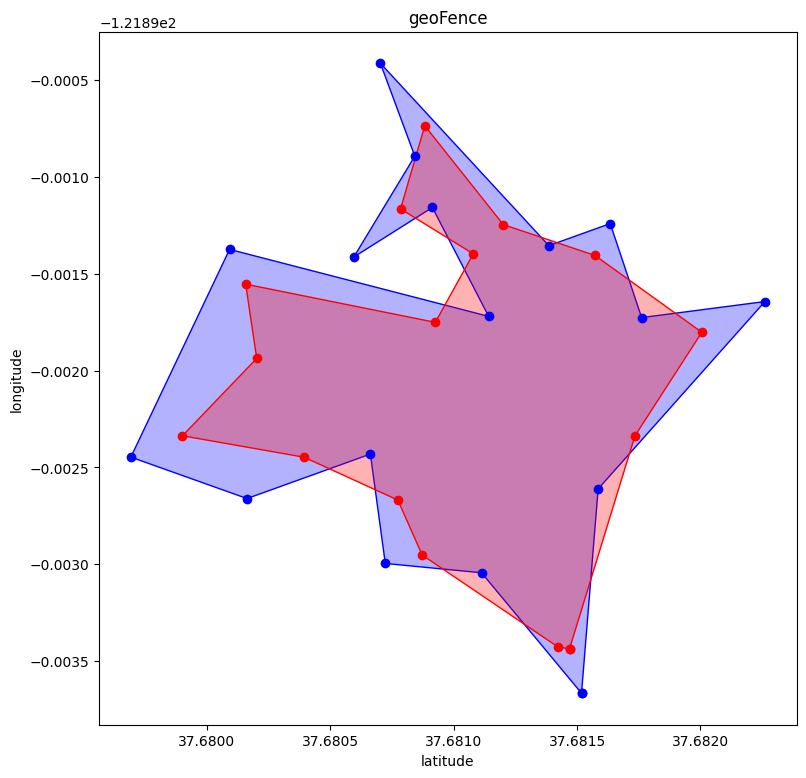

In [12]:
# Plot polygon
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_title("geoFence")
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
plot_polygon(waypoint_polygon, ax=ax, add_points=True, color="red")
plt.show()

### Check if a line intersects the polygon

In [13]:
from shapely.geometry import LineString

# Create a line for two waypoints
line1 = LineString(waypoints[:2])
line2 = LineString(waypoints[1:3])

def line_intersects_polygon(line, polygon):
    # Check if the line intersects the polygon
    if line.intersects(polygon):
        print("Line intersects the polygon.")
    else:
        print("Line does not intersect the polygon.")

line_intersects_polygon(line1, geofence_polygon)
line_intersects_polygon(line2, geofence_polygon)

Line intersects the polygon.
Line intersects the polygon.


line.intersects() is not the one working for us. Try line.crosses():

In [14]:
# Try cross instead
def line_crosses_polygon(line, polygon):
    # Check if the line crosses the polygon
    if line.crosses(polygon):
        print("Line crosses the polygon.")
    else:
        print("Line does not cross the polygon.")


line_crosses_polygon(line1, geofence_polygon)
line_crosses_polygon(line2, geofence_polygon)

Line crosses the polygon.
Line does not cross the polygon.


In [15]:
def line_cross_polygon(line_coordinates, polygon):
    # Create a line for two waypoints
    line = LineString(line_coordinates)

    # Check if the line crosses the polygon
    return line.crosses(polygon)

for i in range(len(waypoints) - 1):
    line_coords = waypoints[i:i+2]
    is_cross = line_cross_polygon(line_coords, geofence_polygon)  
    print(i, line_coords, is_cross)

0 [[37.6814695, -121.8934354], [37.6817346, -121.8923366]] True
1 [[37.6817346, -121.8923366], [37.6820057, -121.8918026]] False
2 [[37.6820057, -121.8918026], [37.6815723, -121.8914061]] True
3 [[37.6815723, -121.8914061], [37.6812009, -121.891247]] True
4 [[37.6812009, -121.891247], [37.6808829, -121.8907372]] False
5 [[37.6808829, -121.8907372], [37.6807847, -121.8911661]] False
6 [[37.6807847, -121.8911661], [37.6810793, -121.891398]] True
7 [[37.6810793, -121.891398], [37.6809256, -121.8917514]] True
8 [[37.6809256, -121.8917514], [37.6801571, -121.8915545]] False
9 [[37.6801571, -121.8915545], [37.6802019, -121.8919375]] False
10 [[37.6802019, -121.8919375], [37.679901, -121.8923366]] False
11 [[37.679901, -121.8923366], [37.6803941, -121.8924472]] False
12 [[37.6803941, -121.8924472], [37.680774, -121.8926684]] True
13 [[37.680774, -121.8926684], [37.6808722, -121.8929516]] False
14 [[37.6808722, -121.8929516], [37.6814229, -121.8934263]] True


line.crosses() works fine. If no cross, we can use the path directly. Otherwise, need to find the shortest path without intersection.

### Add a waypoint if a line intersects with polygon

In [16]:
def get_intersections(line, polygon):

    print("\nline =", list(line.coords))

    intersections = line.intersection(polygon)
    print(intersections.geom_type)
    
    # case 1: no intersection, use directly
    if intersections.geom_type == 'LineString':
        print("No intersections")
        return []

    # case 2: has intersection, add a new waypoint inside polygon
    elif intersections.geom_type == 'MultiLineString':
        print("Intersections:")
        for segment in intersections.geoms:
            print(segment)
        return intersections

num_waypoint_line = len(waypoints) - 1
for i in range(num_waypoint_line):
    line = LineString(waypoints[i:i+2])
    get_intersections(line, geofence_polygon)


line = [(37.6814695, -121.8934354), (37.6817346, -121.8923366)]
MultiLineString
Intersections:
LINESTRING (37.6814695 -121.8934354, 37.68155550401648 -121.89307892616633)
LINESTRING (37.68171224670153 -121.89242925109151, 37.6817346 -121.8923366)

line = [(37.6817346, -121.8923366), (37.6820057, -121.8918026)]
LineString
No intersections

line = [(37.6820057, -121.8918026), (37.6815723, -121.8914061)]
MultiLineString
Intersections:
LINESTRING (37.6820057 -121.8918026, 37.681898223016674 -121.89170427368738)
LINESTRING (37.681710741903544 -121.89153275485639, 37.6815723 -121.8914061)

line = [(37.6815723, -121.8914061), (37.6812009, -121.891247)]
MultiLineString
Intersections:
LINESTRING (37.6815723 -121.8914061, 37.68141909036899 -121.89134046819522)
LINESTRING (37.68135437012001 -121.89131274339282, 37.6812009 -121.891247)

line = [(37.6812009, -121.891247), (37.6808829, -121.8907372)]
LineString
No intersections

line = [(37.6808829, -121.8907372), (37.6807847, -121.8911661)]
LineSt


line = [(37.6820057, -121.8918026), (37.6815723, -121.8914061)]
MultiLineString
Intersections:
LINESTRING (37.6820057 -121.8918026, 37.681898223016674 -121.89170427368738)
LINESTRING (37.681710741903544 -121.89153275485639, 37.6815723 -121.8914061)


/var/folders/ks/6s2sybn54rqdw_1wyc5pxqx40000gn/T/ipykernel_90831/2680779773.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


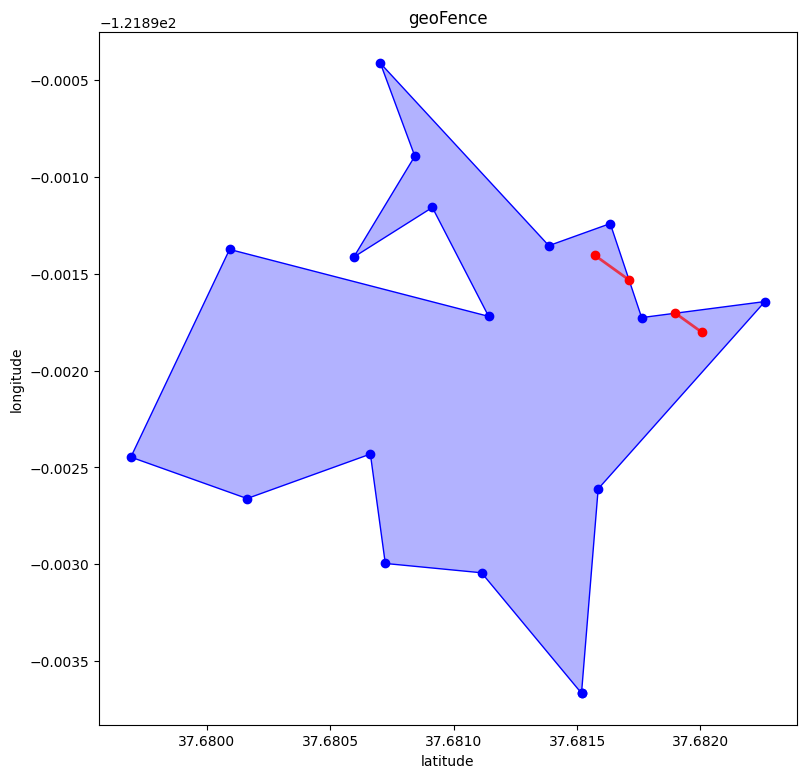

In [17]:
from shapely.plotting import plot_line, plot_polygon

line = LineString(waypoints[2:4])
new_lines = get_intersections(line, geofence_polygon)

if new_lines:
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111)
    ax.set_title("geoFence")
    ax.set_xlabel("latitude")
    ax.set_ylabel("longitude")
    plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
    plot_line(new_lines, ax=ax, add_points=True, color="red", alpha=0.7)
    fig.show()

In [18]:
def get_intersection_points(line, polygon):
    """Return intersection points"""
    intersection_points = []
    intersections = line.intersection(polygon)
    if intersections.geom_type == "LineString":
        return intersection_points
    elif intersections.geom_type == "MultiLineString":
        for seg in intersections.geoms:
            for pt in seg.coords:
                if pt != line.coords[0] and pt != line.coords[1]:
                    intersection_points.append(pt)
    return intersection_points

line = LineString(waypoints[:2])
intersection_points = get_intersection_points(line, geofence_polygon)
print(intersection_points)

[(37.68155550401648, -121.89307892616633), (37.68171224670153, -121.89242925109151)]


In [19]:
def get_intersected_lines(line, polygon):
    """Return intersection points"""
    intersection_lines = []
    intersections = line.intersection(polygon)
    if intersections.geom_type == "LineString":
        return intersection_lines
    elif intersections.geom_type == "MultiLineString":
        for seg in intersections.geoms:
            intersection_lines.append(seg)
    return intersection_lines

line = LineString(waypoints[2:4])
intersection_lines = get_intersected_lines(line, geofence_polygon)
print(intersection_lines)

[<LINESTRING (37.682 -121.892, 37.682 -121.892)>, <LINESTRING (37.682 -121.892, 37.682 -121.891)>]


### Find geofence point between waypoints

In [20]:
def get_polygon_edges(polygon):
    coords = polygon.exterior.coords
    edges = [LineString(coords[i:i+2]) for i in range(len(coords)-1)]
    return edges

for edge in get_polygon_edges(geofence_polygon):
    print(edge)

LINESTRING (37.681518 -121.8936646, 37.6815855 -121.8926105)
LINESTRING (37.6815855 -121.8926105, 37.6822613 -121.8916441)
LINESTRING (37.6822613 -121.8916441, 37.6817617 -121.8917269)
LINESTRING (37.6817617 -121.8917269, 37.6816344 -121.8912419)
LINESTRING (37.6816344 -121.8912419, 37.6813856 -121.8913558)
LINESTRING (37.6813856 -121.8913558, 37.680703 -121.8904147)
LINESTRING (37.680703 -121.8904147, 37.6808425 -121.8908941)
LINESTRING (37.6808425 -121.8908941, 37.6805952 -121.8914147)
LINESTRING (37.6805952 -121.8914147, 37.6809136 -121.8911588)
LINESTRING (37.6809136 -121.8911588, 37.6811416 -121.8917205)
LINESTRING (37.6811416 -121.8917205, 37.6800919 -121.8913751)
LINESTRING (37.6800919 -121.8913751, 37.6796919 -121.8924466)
LINESTRING (37.6796919 -121.8924466, 37.6801628 -121.8926604)
LINESTRING (37.6801628 -121.8926604, 37.6806625 -121.8924309)
LINESTRING (37.6806625 -121.8924309, 37.6807229 -121.8929952)
LINESTRING (37.6807229 -121.8929952, 37.681113 -121.8930433)
LINESTRING (

In [21]:
# find geofence edge that contains an intersection point
def find_polygon_edge(line, polygon):
    edges = []
    for idx, edge in enumerate(get_polygon_edges(polygon)):
        if line.intersects(edge):
            edges.append((idx, edge))
    return edges

for i in range(len(waypoints) - 1):
    line = LineString(waypoints[i:i+2])
    edges = find_polygon_edge(line, geofence_polygon)
    print(i, edges)

0 [(0, <LINESTRING (37.682 -121.894, 37.682 -121.893)>), (1, <LINESTRING (37.682 -121.893, 37.682 -121.892)>)]
1 []
2 [(2, <LINESTRING (37.682 -121.892, 37.682 -121.892)>), (3, <LINESTRING (37.682 -121.892, 37.682 -121.891)>)]
3 [(4, <LINESTRING (37.682 -121.891, 37.681 -121.891)>), (5, <LINESTRING (37.681 -121.891, 37.681 -121.89)>)]
4 []
5 []
6 [(8, <LINESTRING (37.681 -121.891, 37.681 -121.891)>), (9, <LINESTRING (37.681 -121.891, 37.681 -121.892)>)]
7 [(9, <LINESTRING (37.681 -121.891, 37.681 -121.892)>), (10, <LINESTRING (37.681 -121.892, 37.68 -121.891)>)]
8 []
9 []
10 []
11 []
12 [(13, <LINESTRING (37.68 -121.893, 37.681 -121.892)>), (14, <LINESTRING (37.681 -121.892, 37.681 -121.893)>)]
13 []
14 [(15, <LINESTRING (37.681 -121.893, 37.681 -121.893)>), (16, <LINESTRING (37.681 -121.893, 37.682 -121.894)>)]


In [22]:
# Find the geofence point with edges intersected by a waypoint line
def find_polygon_point(line, polygon):
    edges = []
    for idx, edge in enumerate(get_polygon_edges(polygon)):
        if line.intersects(edge):
            edges.append((idx, edge))

    pt_id, pt = -1, None
    if len(edges) == 2:
        print(edges[0][1])
        print(edges[1][1])
        pt_id, pt = edges[1][0], edges[1][1].coords[0]
    
    return pt_id, pt

for i in range(len(waypoints) - 1):
    line = LineString(waypoints[i:i+2])
    pt_id, pt = find_polygon_point(line, geofence_polygon)
    print(i, pt_id, pt)

LINESTRING (37.681518 -121.8936646, 37.6815855 -121.8926105)
LINESTRING (37.6815855 -121.8926105, 37.6822613 -121.8916441)
0 1 (37.6815855, -121.8926105)
1 -1 None
LINESTRING (37.6822613 -121.8916441, 37.6817617 -121.8917269)
LINESTRING (37.6817617 -121.8917269, 37.6816344 -121.8912419)
2 3 (37.6817617, -121.8917269)
LINESTRING (37.6816344 -121.8912419, 37.6813856 -121.8913558)
LINESTRING (37.6813856 -121.8913558, 37.680703 -121.8904147)
3 5 (37.6813856, -121.8913558)
4 -1 None
5 -1 None
LINESTRING (37.6805952 -121.8914147, 37.6809136 -121.8911588)
LINESTRING (37.6809136 -121.8911588, 37.6811416 -121.8917205)
6 9 (37.6809136, -121.8911588)
LINESTRING (37.6809136 -121.8911588, 37.6811416 -121.8917205)
LINESTRING (37.6811416 -121.8917205, 37.6800919 -121.8913751)
7 10 (37.6811416, -121.8917205)
8 -1 None
9 -1 None
10 -1 None
11 -1 None
LINESTRING (37.6801628 -121.8926604, 37.6806625 -121.8924309)
LINESTRING (37.6806625 -121.8924309, 37.6807229 -121.8929952)
12 14 (37.6806625, -121.892430

LINESTRING (37.681518 -121.8936646, 37.6815855 -121.8926105)
LINESTRING (37.6815855 -121.8926105, 37.6822613 -121.8916441)
LINESTRING (37.6822613 -121.8916441, 37.6817617 -121.8917269)
LINESTRING (37.6817617 -121.8917269, 37.6816344 -121.8912419)
LINESTRING (37.6816344 -121.8912419, 37.6813856 -121.8913558)
LINESTRING (37.6813856 -121.8913558, 37.680703 -121.8904147)
LINESTRING (37.6805952 -121.8914147, 37.6809136 -121.8911588)
LINESTRING (37.6809136 -121.8911588, 37.6811416 -121.8917205)
LINESTRING (37.6809136 -121.8911588, 37.6811416 -121.8917205)
LINESTRING (37.6811416 -121.8917205, 37.6800919 -121.8913751)
LINESTRING (37.6801628 -121.8926604, 37.6806625 -121.8924309)
LINESTRING (37.6806625 -121.8924309, 37.6807229 -121.8929952)
LINESTRING (37.6807229 -121.8929952, 37.681113 -121.8930433)
LINESTRING (37.681113 -121.8930433, 37.681518 -121.8936646)


/var/folders/ks/6s2sybn54rqdw_1wyc5pxqx40000gn/T/ipykernel_90831/1603861075.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


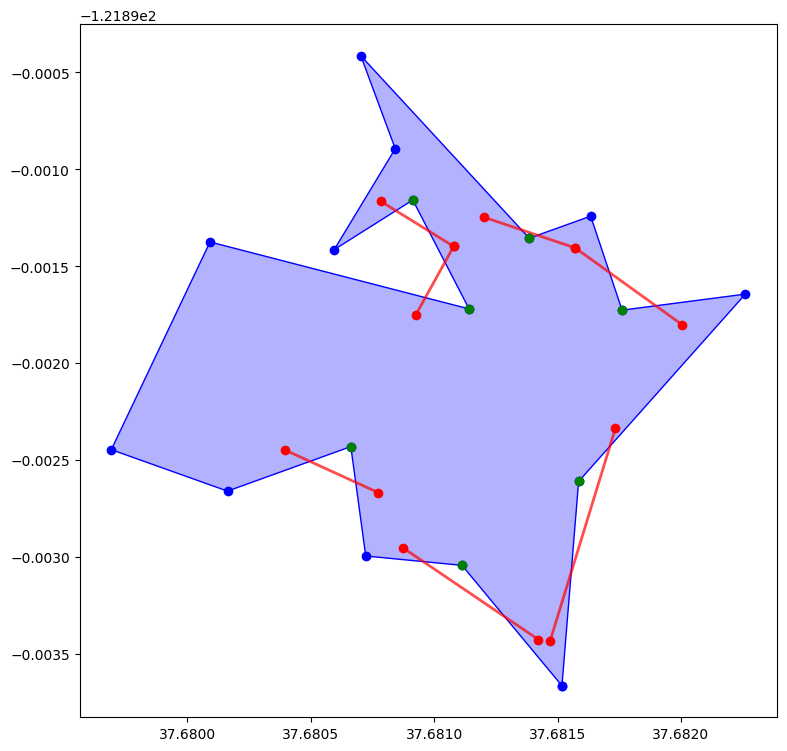

In [23]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
for i in range(len(waypoints) - 1):
    line = LineString(waypoints[i:i+2])
    pt_id, pt = find_polygon_point(line, geofence_polygon)
    if pt:
        plot_line(line, ax=ax, add_points=True, color="red", alpha=0.7)
        ax.plot(pt[0], pt[1], "go")
fig.show()

#### Find a point close to the target as new detour way point

In [24]:
def shared_point(line1, line2):
    """Return the shared point of two lines"""
    if line1.coords[0] == line2.coords[1]:
        return line1.coords[0]
    if line1.coords[1] == line2.coords[0]:
        return line1.coords[1]
    return None

In [25]:
import math

def find_detour_point(line, betweenpoint, dist=25):
    # Unpack coordinates
    x1, y1 = line.coords[0]
    x2, y2 = line.coords[1]
    px, py = betweenpoint
    
    # Find vector perpendicular from line
    slope = (y2 - y1) / (x2 - x1)
    inv_slope = -1 / slope if slope != 0 else 0
    print(f"slope = {slope}, inv_slope = {inv_slope}")

    # Find direction based on the position of the point relative to the line
    cross_product = (x2 - x1) * (py - y1) - (y2 - y1) * (px - x1)
    print(f"cross_product = {cross_product}")
    
    # Point is to the left of the line, adjust direction
    direction = math.atan(inv_slope)
    direction += math.pi  # Adding 180 degrees in radians
    print(f"direction = {direction}")

    # Convert distance in feet to latitude
    dist = dist / 364000

    # Calculate the detour point
    print(math.cos(direction), math.sin(direction))
    detour_x = px + dist * math.cos(direction)
    detour_y = py + dist * math.sin(direction)

    return Point(detour_x, detour_y)


In [26]:
# test
line = LineString(waypoints[:2])
target_point = find_polygon_point(line, geofence_polygon)
print(target_point)
detour_point = find_detour_point(line, target_point[1])

LINESTRING (37.681518 -121.8936646, 37.6815855 -121.8926105)
LINESTRING (37.6815855 -121.8926105, 37.6822613 -121.8916441)
(1, (37.6815855, -121.8926105))
slope = 4.144850999653742, inv_slope = -0.24126319621224968
cross_product = 9.122019000017255e-08
direction = 2.9048536168804397
-0.9721079484751849 0.23453387071245632


/var/folders/ks/6s2sybn54rqdw_1wyc5pxqx40000gn/T/ipykernel_90831/3209736412.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


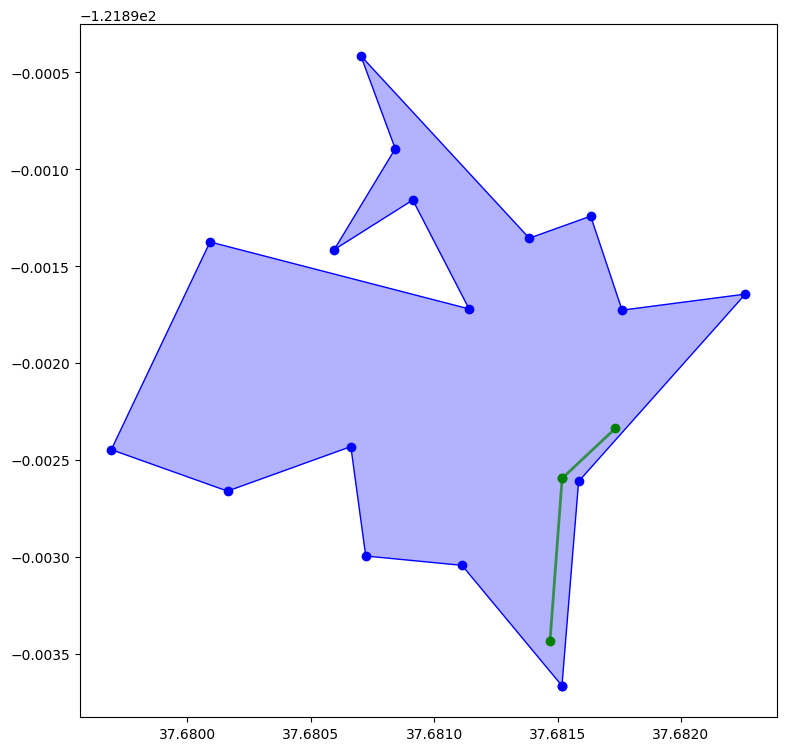

In [27]:
from shapely.plotting import plot_line, plot_polygon

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
point1 = line.coords[0]
point2 = line.coords[1]
line1 = LineString((point1, detour_point))
line2 = LineString((detour_point, point2))
plot_line(line1, ax=ax, add_points=True, color="green", alpha=0.7)
plot_line(line2, ax=ax, add_points=True, color="green", alpha=0.7)
fig.show()

### Adjust a waypoint if outside geofence

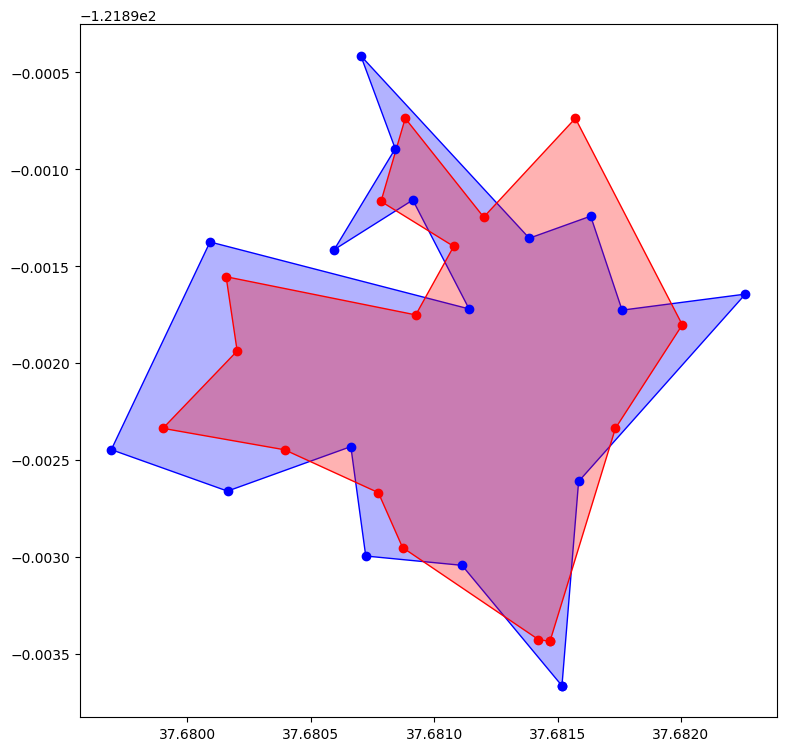

In [28]:
# Move a point to outside of geofence for testing
new_waypoints = waypoints.copy()
new_waypoints[3][1] = new_waypoints[5][1]

# Plot polygon
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
plot_polygon(Polygon(new_waypoints), ax=ax, add_points=True, color="red")
plt.show()

In [29]:
import numpy as np

def nearest_point_on_polygon(point, polygon):
    """Return the nearest exterior point on polygon"""
    nearest_pt_id, nearest_pt, nearest_dist = -1, None, np.inf
    coords = polygon.exterior.coords
    for idx, coord in enumerate(coords):
        dist = Point(point).distance(Point(coord))
        if dist < nearest_dist:
            nearest_pt_id = idx
            nearest_pt = coord
            nearest_dist = dist
    return nearest_pt_id, nearest_pt

Point [37.6815723, -121.8907372] is OUTSIDE geofence
[(3, [37.6815723, -121.8907372])]
4 (37.6816344, -121.8912419)


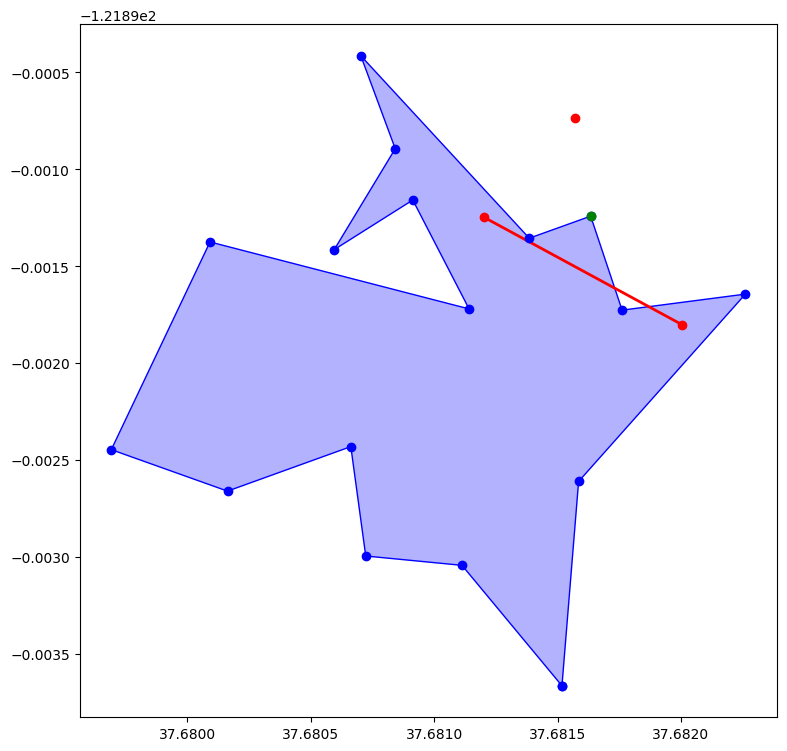

In [30]:
# Check if a waypoint is inside geofence
outside_points = []
for i, pt in enumerate(waypoints):
    if not geofence_polygon.contains(Point(pt)):
        print(f"Point {pt} is OUTSIDE geofence")
        outside_points.append((i, pt))

print(outside_points)

opt_id, opt = outside_points[0][0], outside_points[0][1]
npt_id, npt = nearest_point_on_polygon(opt, geofence_polygon)
print(npt_id, npt)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
ax.plot(opt[0], opt[1], 'ro')
ax.plot(npt[0], npt[1], 'go')
plot_line(LineString((waypoints[opt_id-1], waypoints[opt_id+1])), ax=ax, color="red")
plt.show()

In [31]:
def get_point_in_radius(point, angle, radius):
    x = point[0] + radius * math.cos(math.radians(angle))
    y = point[1] + radius * math.sin(math.radians(angle))
    return (x, y)

# find a pool of candidate points nearby (in 25ft radius) the nearest exterior point 
def get_nearby_points(point, polygon, dist=25, num_points=8):

    # Convert distance in feet to latitude
    radius = dist / 364000
    angle = 360 / num_points

    points = []
    for i in range(num_points):
        (x, y) = get_point_in_radius(point, angle * i, radius)
        if polygon.contains(Point((x, y))):
            points.append((x, y))

    return points

    
id = 10
point = geofence_polygon.exterior.coords[id]
print(id, point)
candidates = get_nearby_points(point, geofence_polygon, num_points=32)
print(len(candidates), candidates)
choice = len(candidates)//2
print(choice, candidates[choice])

10 (37.6811416, -121.8917205)
27 [(37.68121028131868, -121.8917205), (37.681208961626396, -121.89170710093943), (37.68120505326459, -121.89169421679723), (37.68119870642941, -121.89168234270379), (37.68119016502618, -121.89167193497383), (37.68117975729622, -121.89166339357058), (37.68116788320277, -121.8916570467354), (37.681154999060574, -121.8916531383736), (37.6811416, -121.89165181868132), (37.68112820093942, -121.8916531383736), (37.6810742383736, -121.89170710093943), (37.681072918681316, -121.8917205), (37.6810742383736, -121.89173389906058), (37.6810781467354, -121.89174678320278), (37.68108449357058, -121.89175865729622), (37.68109303497381, -121.89176906502618), (37.68110344270377, -121.89177760642943), (37.681115316797225, -121.8917839532646), (37.68112820093942, -121.89178786162641), (37.6811416, -121.89178918131869), (37.681154999060574, -121.89178786162641), (37.68116788320277, -121.8917839532646), (37.68117975729622, -121.89177760642943), (37.68119016502618, -121.891769

#### Find an adjusted point near an exterior point

In [32]:
# get degree of an edge
def line_degree(line):
    angle = math.atan2(line.coords[1][1] - line.coords[0][1], line.coords[1][0] - line.coords[0][0])
    angle_degree = math.degrees(angle)
    return angle_degree

def get_point_mid_degree(i, geofence_coords):
    line1 = LineString((geofence_coords[i], geofence_coords[i-1]))
    line2 = LineString((geofence_coords[i], geofence_coords[i+1]))
    line_degrees = [d + 360 if d < 0 else d for d in [line_degree(line1), line_degree(line2)]]
    mid_angle = line_degrees[1] + (line_degrees[0] - line_degrees[1]) / 2
    print(line_degree(line1), line_degree(line2), line_degrees, mid_angle)
    return mid_angle

def get_adjust_point(id, geofence_polygon, dist=25):
    coords = geofence_polygon.exterior.coords
    mid_angle = get_point_mid_degree(id, coords)
    radius = dist / 364000
    (x, y) = get_point_in_radius(coords[id], mid_angle, radius)
    if geofence_polygon.contains(Point(x, y)):
        return (x, y)
    return get_point_in_radius(coords[id], mid_angle+180, radius)


for i in range(1, len(geofence_coords) - 1):
    (x, y) = get_adjust_point(i, geofence_polygon)
    print(i, x, y)

-93.66397098806895 55.035046289833794 [266.33602901193103, 55.035046289833794] 160.68553765088242
1 37.68152068423801 -121.89258778347444
-124.96495371016621 -170.58975808605496 [235.0350462898338, 189.41024191394504] 212.22264410188941
2 37.682203196806334 -121.8916807216114
9.410241913945043 104.70692239001987 [9.410241913945043, 104.70692239001987] 57.058582151982456
3 37.68172435238664 -121.89178453921679
-75.29307760998014 -155.40181505078675 [284.7069223900198, 204.59818494921325] 244.65255366961654
4 37.681604997089096 -121.8913039692546
24.59818494921327 125.95418161630913 [24.59818494921327, 125.95418161630913] 75.2761832827612
5 37.68136814395628 -121.89142222597438
-54.04581838369087 -73.77559912508787 [305.95418161630914, 286.22440087491213] 296.08929124561064
6 37.680733204074045 -121.89047638336442
106.22440087491213 -115.40906504565929 [106.22440087491213, 244.5909349543407] 175.40766791462642
7 37.68091096082435 -121.89089959900579
64.59093495434071 38.78904992945103 [6

-75.29307760998014 -155.40181505078675 [284.7069223900198, 204.59818494921325] 244.65255366961654


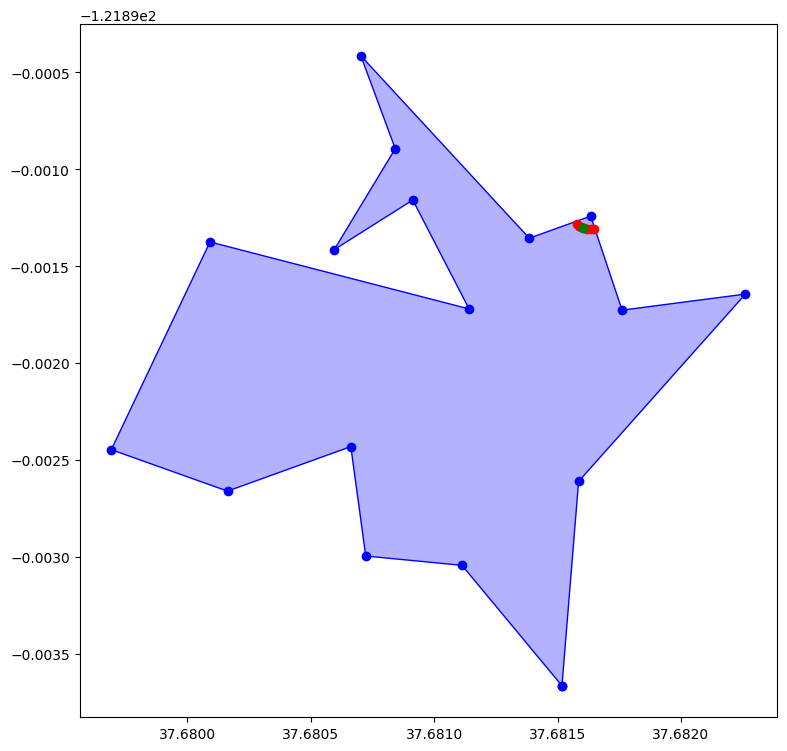

In [33]:
# test and plot
id = 4
point = geofence_polygon.exterior.coords[id]
candidates = get_nearby_points(point, geofence_polygon, dist=25, num_points=32)
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
for cand in candidates:
    ax.plot(cand[0], cand[1], 'ro')
(x, y) = get_adjust_point(id, geofence_polygon)
ax.plot(x, y, 'go')
plt.show()

### Finalize Plan

In [34]:
def adjust_outside_waypoints(waypoints, geofence_polygon):
    """Adjust waypoints that are outside of geoFence to inside"""

    new_waypoints = waypoints.copy()

    outside_points = []
    for i, pt in enumerate(waypoints):
        if not geofence_polygon.contains(Point(pt)):
            outside_points.append((i, pt))

    for opt_id, opt in outside_points:
        print(opt_id, opt)
        nearest_npt_id, nearest_npt = nearest_point_on_polygon(opt, geofence_polygon)
        print("nearest geofence point:", opt_id, nearest_npt_id, nearest_npt)
        adjusted_point = get_adjust_point(nearest_npt_id, geofence_polygon)
        new_waypoints[opt_id] = adjusted_point

    return new_waypoints

In [35]:
# test
adjusted_waypoints = adjust_outside_waypoints(new_waypoints, geofence_polygon)
print("Adjusted_waypoints = ", adjusted_waypoints)

3 [37.6815723, -121.8907372]
nearest geofence point: 3 4 (37.6816344, -121.8912419)
-75.29307760998014 -155.40181505078675 [284.7069223900198, 204.59818494921325] 244.65255366961654
Adjusted_waypoints =  [[37.6814695, -121.8934354], [37.6817346, -121.8923366], [37.6820057, -121.8918026], (37.681604997089096, -121.8913039692546), [37.6812009, -121.891247], [37.6808829, -121.8907372], [37.6807847, -121.8911661], [37.6810793, -121.891398], [37.6809256, -121.8917514], [37.6801571, -121.8915545], [37.6802019, -121.8919375], [37.679901, -121.8923366], [37.6803941, -121.8924472], [37.680774, -121.8926684], [37.6808722, -121.8929516], [37.6814229, -121.8934263]]


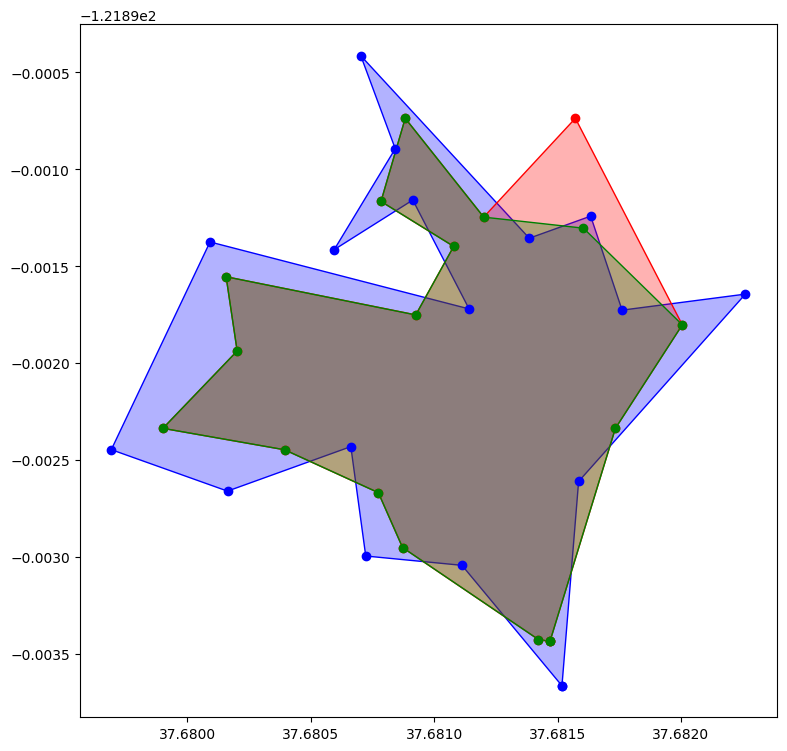

In [36]:
# Plot polygon
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
plot_polygon(Polygon(waypoints), ax=ax, add_points=True, color="red")
plot_polygon(Polygon(adjusted_waypoints), ax=ax, add_points=True, color="green")
plt.show()

In [40]:

def add_detour_points(waypoints, geofence_polygon):
    """Add a detour point for any path between two waypoints intersects geoFence"""

    detour_points = []
    for i in range(len(waypoints) - 1):
        line = LineString(waypoints[i:i+2])
        print(f"Waypoint path {i}-{i+1}:", list(line.coords))
        pt_id, pt = find_polygon_point(line, geofence_polygon)
        if pt:
            detour_point = get_adjust_point(pt_id, geofence_polygon)
            print("detour_point =", detour_point)
            detour_points.append((i+1, detour_point))
    
    new_waypoints = waypoints.copy()
    print("detour_points =", detour_points)
    for i, d in enumerate(detour_points):
        new_waypoints.insert(d[0]+i, d[1])

    return new_waypoints

In [41]:
# test
final_waypoints = add_detour_points(adjusted_waypoints, geofence_polygon)
print("\nFinal waypoints =", final_waypoints)

Waypoint path 0-1: [(37.6814695, -121.8934354), (37.6817346, -121.8923366)]
LINESTRING (37.681518 -121.8936646, 37.6815855 -121.8926105)
LINESTRING (37.6815855 -121.8926105, 37.6822613 -121.8916441)
-93.66397098806895 55.035046289833794 [266.33602901193103, 55.035046289833794] 160.68553765088242
detour_point = (37.68152068423801, -121.89258778347444)
Waypoint path 1-2: [(37.6817346, -121.8923366), (37.6820057, -121.8918026)]
Waypoint path 2-3: [(37.6820057, -121.8918026), (37.681604997089096, -121.8913039692546)]
LINESTRING (37.6822613 -121.8916441, 37.6817617 -121.8917269)
LINESTRING (37.6817617 -121.8917269, 37.6816344 -121.8912419)
9.410241913945043 104.70692239001987 [9.410241913945043, 104.70692239001987] 57.058582151982456
detour_point = (37.68172435238664, -121.89178453921679)
Waypoint path 3-4: [(37.681604997089096, -121.8913039692546), (37.6812009, -121.891247)]
LINESTRING (37.6816344 -121.8912419, 37.6813856 -121.8913558)
LINESTRING (37.6813856 -121.8913558, 37.680703 -121.89

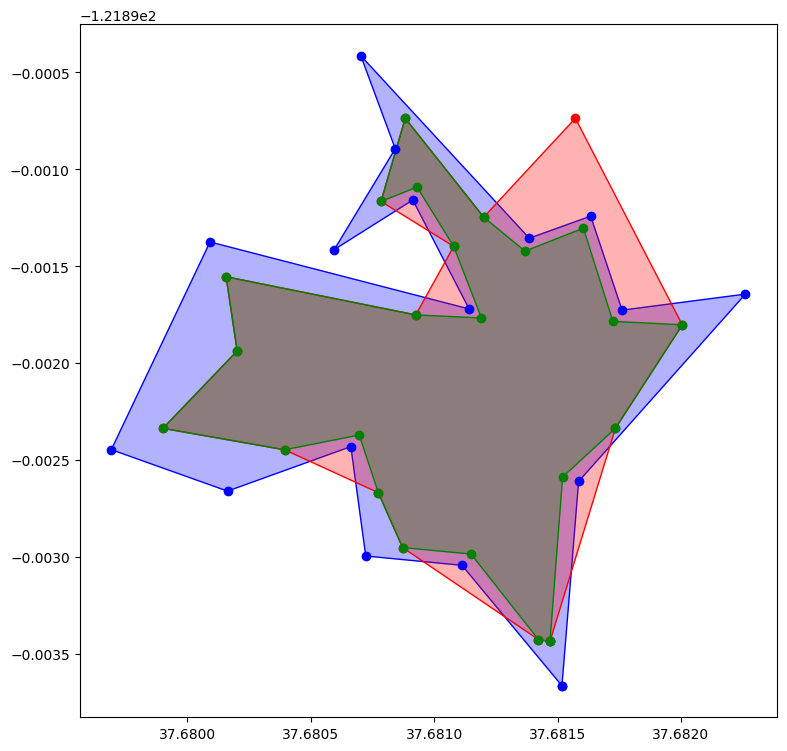

In [42]:
# Plot polygon
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
plot_polygon(Polygon(waypoints), ax=ax, add_points=True, color="red")
plot_polygon(Polygon(final_waypoints), ax=ax, add_points=True, color="green")
plt.show()